## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\Bobson\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.regularizers import l1, l2, l1_l2

def build_mlp_l1(input_shape , output_shape=10, num_nur = [512,256,128], regular=0.0001):
    """Code Here
    建立你的神經網路
    """
    #reg = regular_type(regular)
    inp = Input(input_shape)
    
    for i , n_nur in enumerate(num_nur):
        if i == 0:
            x = Dense(activation = 'relu', units = n_nur, kernel_regularizer = l1(regular), name = 'hidden_layer'+str(i+1))(inp)
        else:
            x = Dense(activation = 'relu', units = n_nur, kernel_regularizer = l1(regular), name = 'hidden_layer'+str(i+1))(x)
            
    output = Dense(activation = 'softmax', units = output_shape, name = 'output_layer')(x)
    
    model = keras.models.Model(inputs = [inp], outputs = [output])   
    
    return model

def build_mlp_l1_l2(input_shape , output_shape=10, num_nur = [512,256,128], regular=0.0001):
    """Code Here
    建立你的神經網路
    """
    #reg = regular_type(regular)
    inp = Input(input_shape)
    
    for i , n_nur in enumerate(num_nur):
        if i == 0:
            x = Dense(activation = 'relu', units = n_nur, kernel_regularizer = l1_l2(regular), name = 'hidden_layer'+str(i+1))(inp)
        else:
            x = Dense(activation = 'relu', units = n_nur, kernel_regularizer = l1_l2(regular), name = 'hidden_layer'+str(i+1))(x)
            
    output = Dense(activation = 'softmax', units = output_shape, name = 'output_layer')(x)
    
    model = keras.models.Model(inputs=[inp], outputs = [output]) 
            
    return model


def build_mlp_l2(input_shape , output_shape=10, num_nur = [512,256,128], regular=0.0001):
    """Code Here
    建立你的神經網路
    """
    #reg = regular_type(regular)
    inp = Input(input_shape)
    
    for i , n_nur in enumerate(num_nur):
        if i == 0:
            x = Dense(activation = 'relu', units = n_nur, kernel_regularizer = l2(regular), name = 'hidden_layer'+str(i+1))(inp)
        else:
            x = Dense(activation = 'relu', units = n_nur, kernel_regularizer = l2(regular), name = 'hidden_layer'+str(i+1))(x)
            
    output = Dense(activation = 'softmax', units = output_shape, name = 'output_layer')(x)
    
    model = keras.models.Model(inputs=[inp], outputs = [output]) 
            
    return model

In [9]:
"""Code Here
設定超參數
"""
epochs = 50
batch_size = 256
regular_type = [l2, l1_l2]
learning_rate = 1e-3
momentum = 0.95
regular = [1e-2, 1e-4, 1e-8, 1e-12]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for j in regular:
    ################## l1 #############################################
    print('l1:regular =', j)
    keras.backend.clear_session()
    model = build_mlp_l1(input_shape = x_train.shape[1:], regular = j)
    model.summary()
    opt = keras.optimizers.SGD(lr = learning_rate, momentum = momentum, nesterov = True)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
    model.fit(x_train, y_train , epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)
        
        
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
        
    results['exper: l1:'+str(j)] = {'train_loss': train_loss, 'valid_loss':valid_loss, 'train_acc':train_acc, 'valid_acc':valid_acc}
    
    ################## l2 #############################################
    print('l2:regular =', j)
    keras.backend.clear_session()
    model = build_mlp_l2(input_shape = x_train.shape[1:], regular = j)
    model.summary()
    opt = keras.optimizers.SGD(lr = learning_rate, momentum = momentum, nesterov = True)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
    model.fit(x_train, y_train , epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)
        
        
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
        
    results['exper: l2:'+str(j)] = {'train_loss': train_loss, 'valid_loss':valid_loss, 'train_acc':train_acc, 'valid_acc':valid_acc}
    
        
    ############## l1_l2 ##############################################
    print('l1_l2 : regular =', j)
    keras.backend.clear_session()
    model = build_mlp_l1_l2(input_shape = x_train.shape[1:], regular = j)
    model.summary()
    opt = keras.optimizers.SGD(lr = learning_rate, momentum = momentum, nesterov = True)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
    model.fit(x_train, y_train , epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)
        
        
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
        
    results['exper:l1_l2'+str(j)] = {'train_loss': train_loss, 'valid_loss':valid_loss, 'train_acc':train_acc, 'valid_acc':valid_acc}

l1:regular = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 137

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 174us/step - loss: 15.0942 - acc: 0.2765 - val_loss: 13.9559 - val_acc: 0.3380
Epoch 2/50
50000/50000 [==============================] - 8s 168us/step - loss: 13.0178 - acc: 0.3613 - val_loss: 12.1290 - val_acc: 0.3722
Epoch 3/50
50000/50000 [==============================] - 8s 167us/step - loss: 11.3443 - acc: 0.3848 - val_loss: 10.5928 - val_acc: 0.3954
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 9.9313 - acc: 0.3996 - val_loss: 9.2927 - val_acc: 0.4079
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 8.7299 - acc: 0.4092 - val_loss: 8.1856 - val_acc: 0.4185
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 7.7056 - acc: 0.4178 - val_loss: 7.2419 - val_acc: 0.4259
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 6.8347 - acc: 0.4247 - val_loss: 6.4

Epoch 2/50
50000/50000 [==============================] - 9s 185us/step - loss: 15.9117 - acc: 0.1077 - val_loss: 5.1291 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 186us/step - loss: 3.2086 - acc: 0.0980 - val_loss: 2.4711 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.4631 - acc: 0.0978 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.4624 - acc: 0.0977 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.4624 - acc: 0.0999 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.4623 - acc: 0.0959 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.4623 - acc: 0.0962 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 9/50
50000/50000 [======

50000/50000 [==============================] - 9s 179us/step - loss: 5.5584 - acc: 0.3990 - val_loss: 5.4955 - val_acc: 0.4082
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 5.4412 - acc: 0.4191 - val_loss: 5.3941 - val_acc: 0.4237
Epoch 5/50
50000/50000 [==============================] - 9s 170us/step - loss: 5.3337 - acc: 0.4335 - val_loss: 5.2890 - val_acc: 0.4385
Epoch 6/50
50000/50000 [==============================] - 8s 168us/step - loss: 5.2327 - acc: 0.4469 - val_loss: 5.1944 - val_acc: 0.4485
Epoch 7/50
50000/50000 [==============================] - 9s 172us/step - loss: 5.1374 - acc: 0.4582 - val_loss: 5.1458 - val_acc: 0.4423
Epoch 8/50
50000/50000 [==============================] - 9s 172us/step - loss: 5.0471 - acc: 0.4685 - val_loss: 5.0239 - val_acc: 0.4614
Epoch 9/50
50000/50000 [==============================] - 9s 174us/step - loss: 4.9612 - acc: 0.4779 - val_loss: 4.9449 - val_acc: 0.4663
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 9s 181us/step - loss: 1.8097 - acc: 0.4153 - val_loss: 1.7965 - val_acc: 0.4119
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.7635 - acc: 0.4312 - val_loss: 1.7474 - val_acc: 0.4279
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7221 - acc: 0.4475 - val_loss: 1.7172 - val_acc: 0.4479
Epoch 7/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.6863 - acc: 0.4585 - val_loss: 1.6885 - val_acc: 0.4464
Epoch 8/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.6554 - acc: 0.4688 - val_loss: 1.6676 - val_acc: 0.4591
Epoch 9/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6270 - acc: 0.4767 - val_loss: 1.6407 - val_acc: 0.4700
Epoch 10/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.6007 - acc: 0.4889 - val_loss: 1.6283 - val_acc: 0.4742
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 9s 189us/step - loss: 10.5391 - acc: 0.4038 - val_loss: 9.8365 - val_acc: 0.4037
Epoch 6/50
50000/50000 [==============================] - 10s 198us/step - loss: 9.2017 - acc: 0.4104 - val_loss: 8.5945 - val_acc: 0.4160
Epoch 7/50
50000/50000 [==============================] - 10s 199us/step - loss: 8.0610 - acc: 0.4173 - val_loss: 7.5526 - val_acc: 0.4144
Epoch 8/50
50000/50000 [==============================] - 10s 198us/step - loss: 7.0918 - acc: 0.4211 - val_loss: 6.6594 - val_acc: 0.4147
Epoch 9/50
50000/50000 [==============================] - 10s 200us/step - loss: 6.2664 - acc: 0.4253 - val_loss: 5.8980 - val_acc: 0.4222
Epoch 10/50
50000/50000 [==============================] - 10s 199us/step - loss: 5.5627 - acc: 0.4296 - val_loss: 5.2423 - val_acc: 0.4335
Epoch 11/50
50000/50000 [==============================] - 9s 189us/step - loss: 4.9631 - acc: 0.4327 - val_loss: 4.6992 - val_acc: 0.4252
Epoch 12/50
50000/50000 [============

50000/50000 [==============================] - 9s 172us/step - loss: 1.5655 - acc: 0.4522 - val_loss: 1.5637 - val_acc: 0.4496
Epoch 7/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.5326 - acc: 0.4635 - val_loss: 1.5488 - val_acc: 0.4535
Epoch 8/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.5022 - acc: 0.4735 - val_loss: 1.5346 - val_acc: 0.4561
Epoch 9/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.4753 - acc: 0.4821 - val_loss: 1.5022 - val_acc: 0.4689
Epoch 10/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.4482 - acc: 0.4911 - val_loss: 1.4746 - val_acc: 0.4789
Epoch 11/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.4250 - acc: 0.5005 - val_loss: 1.4660 - val_acc: 0.4794
Epoch 12/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.4033 - acc: 0.5070 - val_loss: 1.4834 - val_acc: 0.4703
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 8s 164us/step - loss: 1.5363 - acc: 0.4616 - val_loss: 1.5355 - val_acc: 0.4567
Epoch 8/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5034 - acc: 0.4728 - val_loss: 1.5220 - val_acc: 0.4625
Epoch 9/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.4753 - acc: 0.4830 - val_loss: 1.5005 - val_acc: 0.4654
Epoch 10/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4501 - acc: 0.4901 - val_loss: 1.4730 - val_acc: 0.4785
Epoch 11/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4256 - acc: 0.4978 - val_loss: 1.4676 - val_acc: 0.4792
Epoch 12/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4020 - acc: 0.5069 - val_loss: 1.4494 - val_acc: 0.4844
Epoch 13/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.3811 - acc: 0.5143 - val_loss: 1.4377 - val_acc: 0.4885
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 9s 188us/step - loss: 6.0903 - acc: 0.4268 - val_loss: 5.7579 - val_acc: 0.4230
Epoch 9/50
50000/50000 [==============================] - 9s 188us/step - loss: 5.4556 - acc: 0.4305 - val_loss: 5.1710 - val_acc: 0.4317
Epoch 10/50
50000/50000 [==============================] - 9s 189us/step - loss: 4.9111 - acc: 0.4365 - val_loss: 4.6702 - val_acc: 0.4337
Epoch 11/50
50000/50000 [==============================] - 9s 188us/step - loss: 4.4476 - acc: 0.4415 - val_loss: 4.2434 - val_acc: 0.4387
Epoch 12/50
50000/50000 [==============================] - 9s 189us/step - loss: 4.0484 - acc: 0.4445 - val_loss: 3.8753 - val_acc: 0.4447
Epoch 13/50
50000/50000 [==============================] - 9s 188us/step - loss: 3.7092 - acc: 0.4494 - val_loss: 3.5641 - val_acc: 0.4450
Epoch 14/50
50000/50000 [==============================] - 9s 187us/step - loss: 3.4162 - acc: 0.4531 - val_loss: 3.2957 - val_acc: 0.4471
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 8s 170us/step - loss: 1.4889 - acc: 0.4788 - val_loss: 1.5234 - val_acc: 0.4619
Epoch 10/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.4624 - acc: 0.4873 - val_loss: 1.4899 - val_acc: 0.4740
Epoch 11/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.4400 - acc: 0.4950 - val_loss: 1.4751 - val_acc: 0.4811
Epoch 12/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.4161 - acc: 0.5019 - val_loss: 1.4496 - val_acc: 0.4846
Epoch 13/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.3924 - acc: 0.5115 - val_loss: 1.4393 - val_acc: 0.4872
Epoch 14/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.3729 - acc: 0.5175 - val_loss: 1.4455 - val_acc: 0.4876
Epoch 15/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.3524 - acc: 0.5267 - val_loss: 1.4163 - val_acc: 0.4974
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 8s 167us/step - loss: 1.4633 - acc: 0.4860 - val_loss: 1.4855 - val_acc: 0.4730
Epoch 11/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.4385 - acc: 0.4941 - val_loss: 1.4636 - val_acc: 0.4798
Epoch 12/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.4154 - acc: 0.5027 - val_loss: 1.4617 - val_acc: 0.4823
Epoch 13/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.3946 - acc: 0.5100 - val_loss: 1.4711 - val_acc: 0.4791
Epoch 14/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.3756 - acc: 0.5166 - val_loss: 1.4289 - val_acc: 0.4908
Epoch 15/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.3544 - acc: 0.5218 - val_loss: 1.4166 - val_acc: 0.4979
Epoch 16/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.3358 - acc: 0.5290 - val_loss: 1.4204 - val_acc: 0.4925
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 10s 192us/step - loss: 4.4529 - acc: 0.4414 - val_loss: 4.2454 - val_acc: 0.4444
Epoch 12/50
50000/50000 [==============================] - 10s 191us/step - loss: 4.0542 - acc: 0.4475 - val_loss: 3.9087 - val_acc: 0.4302
Epoch 13/50
50000/50000 [==============================] - 10s 193us/step - loss: 3.7136 - acc: 0.4501 - val_loss: 3.5663 - val_acc: 0.4453
Epoch 14/50
50000/50000 [==============================] - 9s 190us/step - loss: 3.4228 - acc: 0.4538 - val_loss: 3.3118 - val_acc: 0.4393
Epoch 15/50
50000/50000 [==============================] - 9s 190us/step - loss: 3.1724 - acc: 0.4587 - val_loss: 3.1032 - val_acc: 0.4425
Epoch 16/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.9588 - acc: 0.4604 - val_loss: 2.8696 - val_acc: 0.4619
Epoch 17/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.7740 - acc: 0.4657 - val_loss: 2.7054 - val_acc: 0.4608
Epoch 18/50
50000/50000 [=========

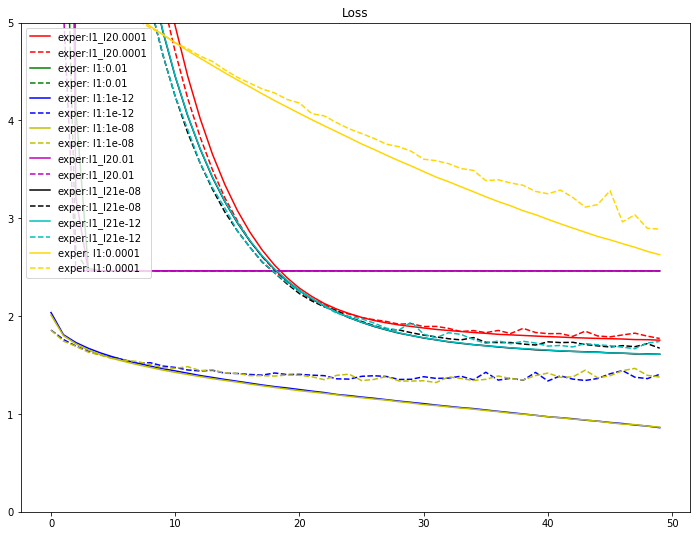

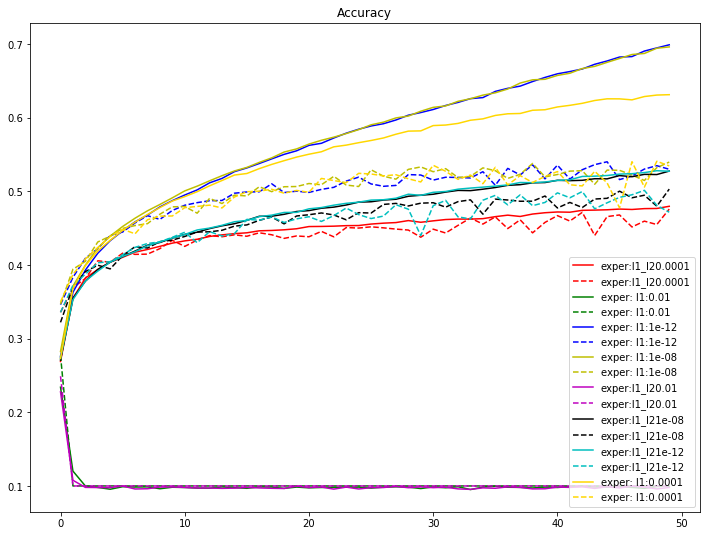

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c" , "gold" ,"silver", "magenta", "tomato","tan"]

aa = list(results.keys())
aa.remove('exper: l2:1e-12')
aa.remove('exper: l2:0.0001')
aa.remove('exper: l2:1e-08')
aa.remove('exper: l2:0.01')

plt.figure(figsize=(12,9))
for i, cond in enumerate(aa):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(aa):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()